# Probability Distributions of Random Variables

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

---
## [SciPy](https://scipy.org)

[scipy.stats](https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html)

In [2]:
import scipy as sp
import scipy.stats as st

---
## Binomial Distribution

#### <font color=darkred> **Example**: A couple, who are both carriers for a recessive disease, wish to have 5 children. They want to know the probability that they will have four healthy kids.</font>

In this case the random variable is the number of healthy kids.

In [99]:
# number of trials (kids)
n = 5

# probability of success on each trial
# i.e. probability that each child will be healthy = 1 - 0.5 * 0.5 = 0.75
p = 0.75

print(f"The probability of having four healthy kids is {st.binom.pmf(4, n, p)}")

The probability of having four healthy kids is 0.39550781249999994


#### <font color=darkred>Let's visualize the probability for the couple to have each of 0-5 healthy kids.</font>

In [161]:
# binomial distribution describing the predicted number of healthy children
dist = st.binom(n, p)

# all possible # of successes out of n trials
# i.e. all possible outcomes of the random variable
# i.e. all possible number of healthy kids = 0-5
possibleNumHealthyKids = np.arange(n+1)

# probability of obtaining each possible number of successes
# i.e. probability of having each possible number of healthy children
pmf = dist.pmf(possibleNumHealthyKids)

# cumulative probability for each k of obtaining 0-k successes
# i.e. probability of having this many or fewer healthy children
cdf = dist.cdf(possibleNumHealthyKids)

print(possibleNumHealthyKids)
print(pmf)

[0 1 2 3 4 5]
[0.00097656 0.01464844 0.08789062 0.26367187 0.39550781 0.23730469]


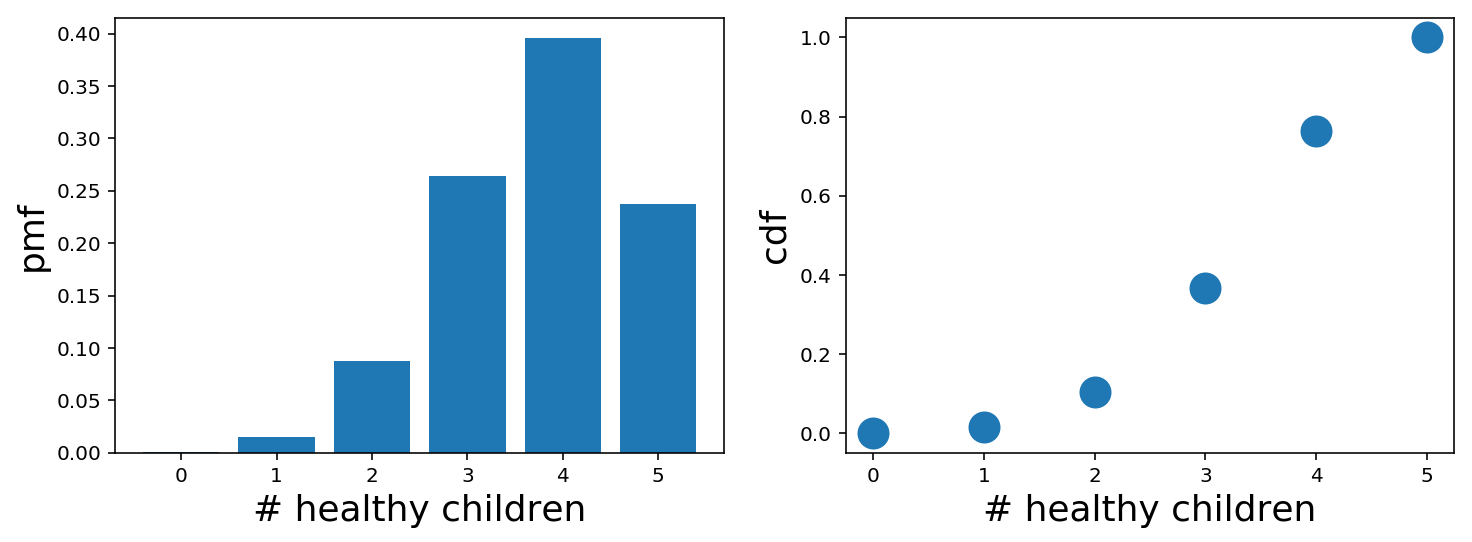

In [162]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.bar(possibleNumHealthyKids, pmf)
plt.xlabel('# healthy children', fontsize=18)
plt.ylabel('pmf', fontsize=18);

plt.subplot(1, 2, 2)
plt.plot(possibleNumHealthyKids, cdf, 'o', ms=15)
plt.xlabel('# healthy children', fontsize=18)
plt.ylabel('cdf', fontsize=18);

#### <font color=darkred>What is the expected number of healthy kids the couple will have?</font>

In [103]:
print(f"The expected number of healthy kids is {dist.mean()}")

The expected number of healthy kids is 3.75


#### <font color=darkred>How good is the above estimate? i.e. What is the variance (and standard deviation) about the expected number of healthy kids?</font>

In [104]:
print(f"Variance = {dist.var()}")
print(f"Standard Deviation = {dist.std()}")

Variance = 0.9375
Standard Deviation = 0.9682458365518543


In [105]:
print(f"The expected number of healthy kids is {dist.mean()} ± {dist.std():.2f}")

The expected number of healthy kids is 3.75 ± 0.97


### <font color=red> Exercise:</font>

1. Should the couple consider having six children? What's the probability that they will all be healthy? Plot the *pmf* and *cdf* for their chances of having up to six healthy kids. *Hint: You can reuse the above code cells.*

---
## Poisson Distribution

#### <font color=darkred> **Example**: Assume that the rate of deleterious mutations is ~1.2 per diploid genome. What is the probability that an individual has 12 or more spontaneous deleterious mutations?</font>

In this case the random variable is the number of deleterious mutations within an individuals genome.

In [128]:
# the rate of deleterious mutations is 1.2 per diploid genome.
rate = 1.2

# Poisson distribution describing the predicted number of spontaneous mutations
dist = st.poisson(rate)

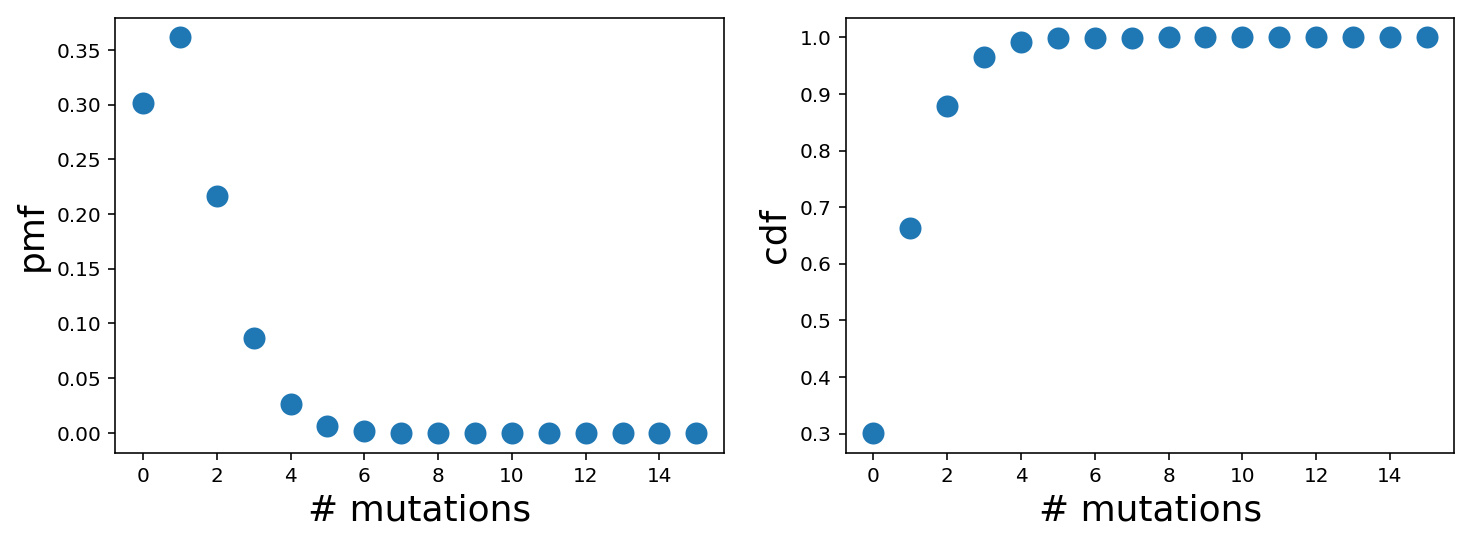

In [129]:
# let's look at the probability for 0-15 mutations
numMutations = np.arange(16)

plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(numMutations, dist.pmf(numMutations), 'o', ms=10)
plt.xlabel('# mutations', fontsize=18)
plt.ylabel('pmf', fontsize=18);

plt.subplot(1, 2, 2)
plt.plot(numMutations, dist.cdf(numMutations), 'o', ms=10)
plt.xlabel('# mutations', fontsize=18)
plt.ylabel('cdf', fontsize=18);

In [131]:
print(f"Probability of 12 or more mutations is {1 - dist.cdf(11)}")
print(f"Probability of 3 or more mutations is {1 - dist.cdf(2) :.2f}")

Probability of 12 or more mutations is 6.17211459719158e-09
Probability of 3 or more mutations is 0.12


### <font color=red> Exercise:</font>

1. For the above example, what is the probability that an individual has three or more mutations?

---
# Exponential Distribution

#### <font color=darkred> **Example**: Assume that a neuron spikes 1.5 times per second on average. Plot the probability density function of interspike intervals from zero to five seconds with a resolution of 0.01 seconds.</font>

In this case the random variable is the interspike interval time.

In [132]:
# spike rate per second
rate = 1.5

# exponential distribution describing the neuron's predicted interspike intervals
dist = st.expon(loc=0, scale=1/rate)

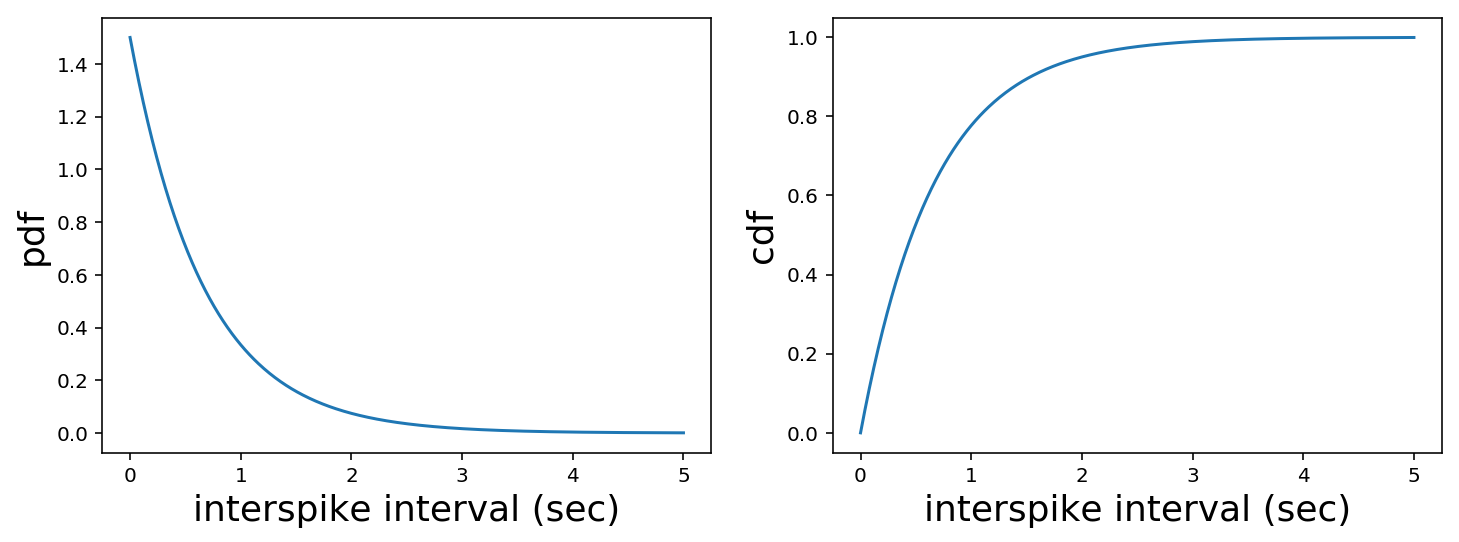

In [133]:
# plot interspike intervals from 0-5 seconds at 0.01 sec resolution
intervalsSec = np.linspace(0, 5, 501)

plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(intervalsSec, dist.pdf(intervalsSec))
plt.xlabel('interspike interval (sec)', fontsize=18)
plt.ylabel('pdf', fontsize=18);

plt.subplot(1, 2, 2)
plt.plot(intervalsSec, dist.cdf(intervalsSec))
plt.xlabel('interspike interval (sec)', fontsize=18)
plt.ylabel('cdf', fontsize=18);

#### <font color=darkred> What is the mean expected interval time and the standard deviation about this mean?</font>

In [134]:
print(f"Expected average interspike interval = {dist.mean() :.2f} ± {dist.std() :.2f} seconds.")

Expected average interspike interval = 0.67 ± 0.67 seconds.


#### <font color=darkred> What is the probability that an interval will be between 1 and 2 seconds?</font>

In [135]:
prob1to2 = dist.cdf(2) - dist.cdf(1);

print(f"Probability of an interspike interval being between 1 and 2 seconds is {prob1to2 :.2f}")

Probability of an interspike interval being between 1 and 2 seconds is 0.17


#### <font color=darkred> For what time *T* is the probability that an interval is shorter than *T* equal to 25%?</font>

In [136]:
print(f"There is a 25% chance that an interval is shorter than {dist.ppf(0.25) :.2f} seconds.")

There is a 25% chance that an interval is shorter than 0.19 seconds.


### <font color=red> Exercise:</font>

1. For the above example, what is the probability that 3 seconds will pass without any spikes?

---
## Normal Distribution

#### <font color=darkred> **Example**: Under basal conditions the resting membrane voltage of a neuron fluctuates around -70 mV with a variance of 10 mV.</font>

In this case the random variable is the neuron's resting membrane voltage.

In [164]:
# mean resting membrane voltage (mV)
mu = -70

# standard deviation about the mean
sd = np.sqrt(10)

# normal distribution describing the neuron's predicted resting membrane voltage
dist = st.norm(mu, sd)

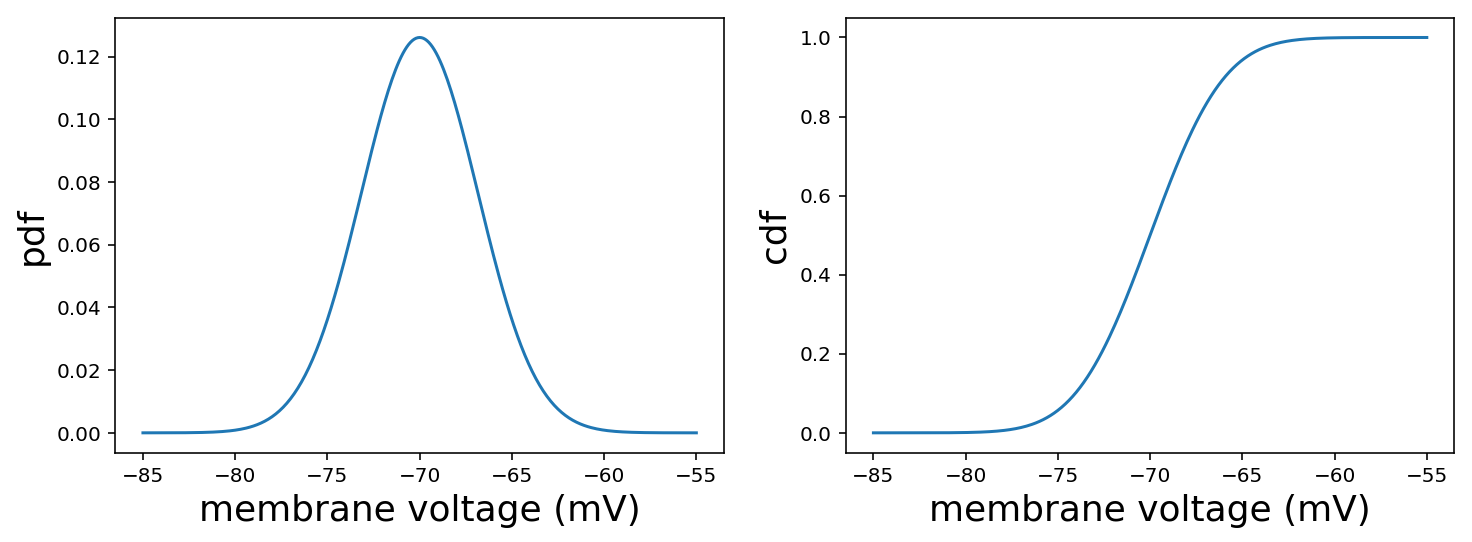

In [165]:
# plot interspike intervals from 0-5 seconds at 0.01 sec resolution
mV = np.linspace(-85, -55, 301)

plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(mV, dist.pdf(mV))
plt.xlabel('membrane voltage (mV)', fontsize=18)
plt.ylabel('pdf', fontsize=18);

plt.subplot(1, 2, 2)
plt.plot(mV, dist.cdf(mV))
plt.xlabel('membrane voltage (mV)', fontsize=18)
plt.ylabel('cdf', fontsize=18);

#### <font color=darkred> What range of membrane voltages (centered on the mean) account for 95% of the probability.</font>

In [166]:
low = dist.ppf(0.025)
high = dist.ppf(0.975)

print(f"95% of membrane voltages are expected to fall within {low :.1f} and {high :.1f} mV.")

95% of membrane voltages are expected to fall within -76.2 and -63.8 mV.


#### <font color=darkred> Replot the above *pdf* and add a line for the mean and shade the 95% probability range computed above.</font>

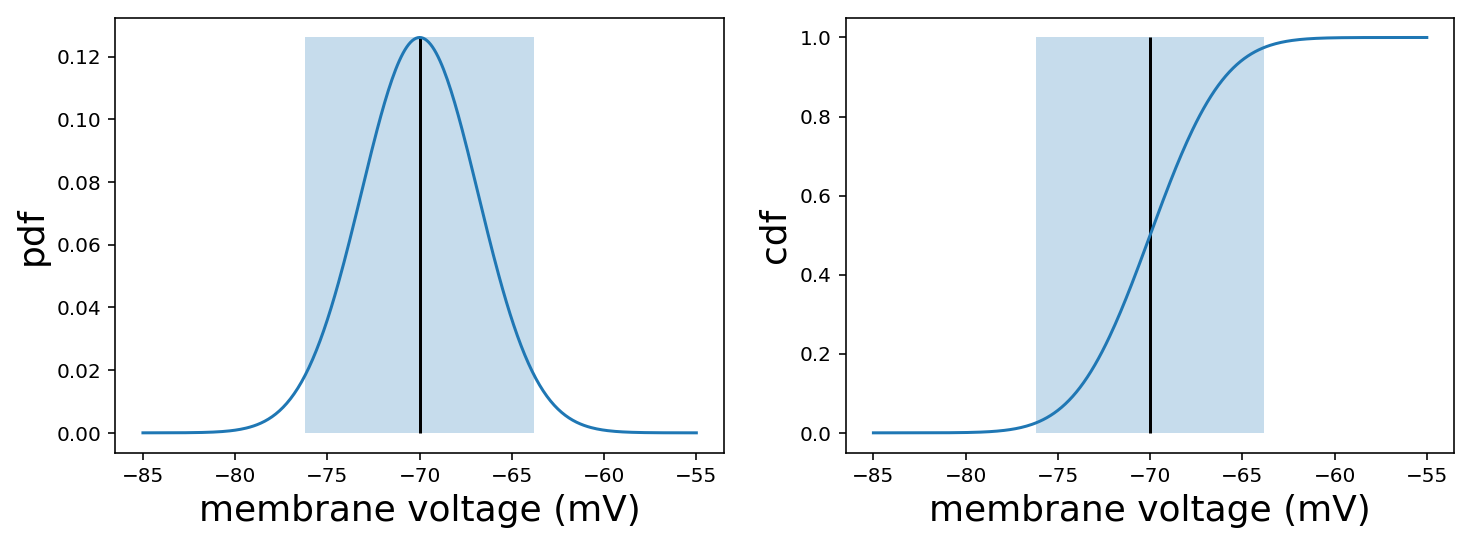

In [167]:
# plot interspike intervals from 0-5 seconds at 0.01 sec resolution
mV = np.linspace(-85, -55, 301)

peak = dist.pdf(mu)

plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(mV, dist.pdf(mV))
plt.vlines(mu, 0, peak)
plt.fill_between([low, high], [0, 0], [peak, peak], alpha=0.25)
plt.xlabel('membrane voltage (mV)', fontsize=18)
plt.ylabel('pdf', fontsize=18);

plt.subplot(1, 2, 2)
plt.plot(mV, dist.cdf(mV))
plt.vlines(mu, 0, 1)
plt.fill_between([low, high], [0, 0], [1, 1], alpha=0.25)
plt.xlabel('membrane voltage (mV)', fontsize=18)
plt.ylabel('cdf', fontsize=18);

### <font color=red> Exercise:</font>

1. For the above example, if you measure a membrane voltage of -65 mV, is the neuron at rest?